In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import os

exec(open("../header.py").read())

Header initialized


In [30]:
threshold = 40

In [31]:
raw_train_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_train_data.csv"))
raw_val_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_val_data.csv"))
raw_test_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_test_data.csv"))

In [32]:
raw_train_data.columns

Index(['poetry_text', 'sympathi', 'meet', 'high', 'among', 'steep',
       'splendour', 'wood', 'like', 'grow',
       ...
       'crumbl', 'chiefli', 'england', 'vein', 'meek', 'ash', 'pair', 'utmost',
       'fierc', 'poetry_author'],
      dtype='object', length=1899)

In [33]:
raw_val_data.shape

(127, 1899)

In [34]:
raw_val_data.poetry_author.value_counts()

William Shakespeare      17
Alfred, Lord Tennyson    16
Emily Dickinson          12
Rae Armantrout           12
William Wordsworth       12
William Butler Yeats     10
John Ashbery              9
Yusef Komunyakaa          8
John Donne                8
Percy sshe Shelley        8
Walt Whitman              8
Kay Ryan                  7
Name: poetry_author, dtype: int64

### Import

In [35]:
X_train = raw_train_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
X_val = raw_val_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
y_train = raw_train_data['poetry_author']
y_val = raw_val_data['poetry_author']

### Model

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
mlp = MLPClassifier(hidden_layer_sizes = (50,10,), activation='relu')

### Train

In [38]:
y_pred = mlp.fit(X_train, y_train)

### Evaluate

In [39]:
# Training
y_pred_train = mlp.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train) * 100
print("Training Accuracy: %.2f%%"%(train_accuracy))

# Validation
y_pred_val = mlp.predict(X_val)
val_accuracy = np.mean(y_pred_val == y_val) * 100
print("Validation Accuracy: %.2f%%"%(val_accuracy))

Training Accuracy: 100.00%
Validation Accuracy: 43.31%


# Accuracy by author

In [25]:
acc = pd.DataFrame({'pred':y_pred_val,
                    'true':y_val})

acc_by_author = acc\
    .assign(correct = lambda x:x.pred == x.true)\
    .assign(count_one = 1)\
    .groupby('true')\
    .agg({'correct':'mean',
          'count_one':'sum'})\
    .rename({'count_one':'total'}, axis = 1)

acc_by_author

,correct,total
true,,
"Alfred, Lord Tennyson",0.625000,16
Emily Dickinson,0.333333,12
John Ashbery,0.555556,9
John Donne,0.375000,8
Kay Ryan,0.571429,7
Percy sshe Shelley,0.250000,8
Rae Armantrout,0.416667,12
Walt Whitman,0.125000,8
William Butler Yeats,0.400000,10


## Tuning process

In [15]:
def tuning_loop(hl_choices):
    
    train_accuracies = []
    val_accuracies = []

    for hl in hl_choices:
        model = MLPClassifier(hidden_layer_sizes = hl, activation='relu')
        model.fit(X_train, y_train)
        # Training
        y_pred_train = model.predict(X_train)
        train_accuracy = np.mean(y_pred_train == y_train) * 100
        train_accuracies.append(train_accuracy)

        # Validation
        y_pred_val = model.predict(X_val)
        val_accuracy = np.mean(y_pred_val == y_val) * 100
        val_accuracies.append(val_accuracy)
        
    return train_accuracies, val_accuracies

In [26]:
def plot_results(tune_var, train, val):
    fig, ax = plt.subplots()
    ax.plot(tune_var, train, label = "Train")
    ax.plot(tune_var, val, label = "Validation")
    ax.set_title("Multi-layer Perceptron Accuracy versus Max Depth")
    ax.set_xlabel("Hidden Layer Size")
    ax.set_ylabel("Accuracy (%)")
    ax.legend()
    
    print("Maximum validation accuracy, %.2f%% found a hidden layer size of %.2f."\
      %(max(val), tune_var[np.argmax(val)]))

## Tune 1

In [27]:
hl_choices1 = [5,20,50,100]
t1, v1 = tuning_loop(hl_choices1)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Maximum validation accuracy, 58.27% found a hidden layer size of 50.00.


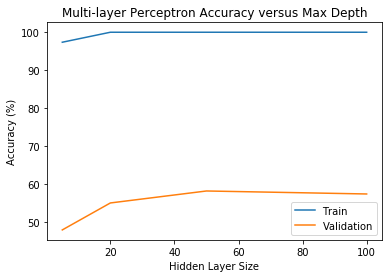

In [28]:
plot_results(hl_choices1, t1, v1)